# # 1.0V
#
# ## Script oriented towards DATA PRE-PROCESSING
#
# ### Actions performed:
#
# 1. **Data Cleaning**:
#     - Identification and removal of NaN values
#     - Linear interpolation for missing values
#
# 2. **Trend and Seasonal Pattern Analysis**:
#     - Daily and Weekly Resampling
#
# 3. **Feature Correlation**
#
# 4. **Outlier Analysis**
#
# 5. **Generation of a new preprocessed and normalized data CSV**

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  src.utils.load_dataframe import load_time_series_60min

In [29]:
# DEFINE CSV FILE NAME TO BE GENERATED (CHANGE NAME IF THERE ARE CODE MODIFICATIONS)
n = '0'

In [30]:
# Load the data
data = load_time_series_60min()


In [31]:
data.head(10)

,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,BE_wind_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:00:00+00:00,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00+00:00,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,734.81,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
2015-01-01 02:00:00+00:00,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,766.64,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
2015-01-01 03:00:00+00:00,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,733.13,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN
2015-01-01 04:00:00+00:00,2015-01-01T05:00:00+0100,5309.0,6609.0,35.0,NaN,64.0,8487.0,8806.0,NaN,730.99,...,998.67,824.0,NaN,1.60,2626.0,2790.0,3.8,NaN,NaN,NaN
2015-01-01 05:00:00+00:00,2015-01-01T06:00:00+0100,5574.0,6543.0,35.0,NaN,84.0,8428.0,8805.0,NaN,820.66,...,1045.17,886.0,NaN,0.00,2641.0,2830.0,3.8,NaN,NaN,NaN
2015-01-01 06:00:00+00:00,2015-01-01T07:00:00+0100,5925.0,6851.0,36.0,NaN,131.0,8122.0,8651.0,NaN,940.12,...,1085.06,985.0,NaN,0.00,2622.0,2790.0,3.8,NaN,NaN,NaN
2015-01-01 07:00:00+00:00,2015-01-01T08:00:00+0100,6343.0,7061.0,36.0,2.0,109.0,8179.0,8674.0,NaN,1087.66,...,1142.36,1109.0,NaN,0.00,2691.0,2980.0,3.9,NaN,NaN,NaN


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50401 entries, 2014-12-31 23:00:00+00:00 to 2020-09-30 23:00:00+00:00
Columns: 299 entries, cet_cest_timestamp to UA_load_forecast_entsoe_transparency
dtypes: float64(298), object(1)
memory usage: 115.4+ MB


In [33]:
# Filter the relevant columns
variables_of_interest = ['DE_solar_generation_actual', 'DE_wind_generation_actual', 'DE_load_actual_entsoe_transparency', 'DE_LU_price_day_ahead']
data = data[variables_of_interest]

In [34]:
missing_values = data.isnull().sum()
print(missing_values)

DE_solar_generation_actual              104
DE_wind_generation_actual                75
DE_load_actual_entsoe_transparency        1
DE_LU_price_day_ahead                 32861
dtype: int64


In [35]:
# Apply linear interpolation to fill missing values
data_interpolated = data.interpolate(method='linear')

# Check again if the NaN values were removed
print(data_interpolated.isnull().sum())

DE_solar_generation_actual                8
DE_wind_generation_actual                 1
DE_load_actual_entsoe_transparency        1
DE_LU_price_day_ahead                 32856
dtype: int64


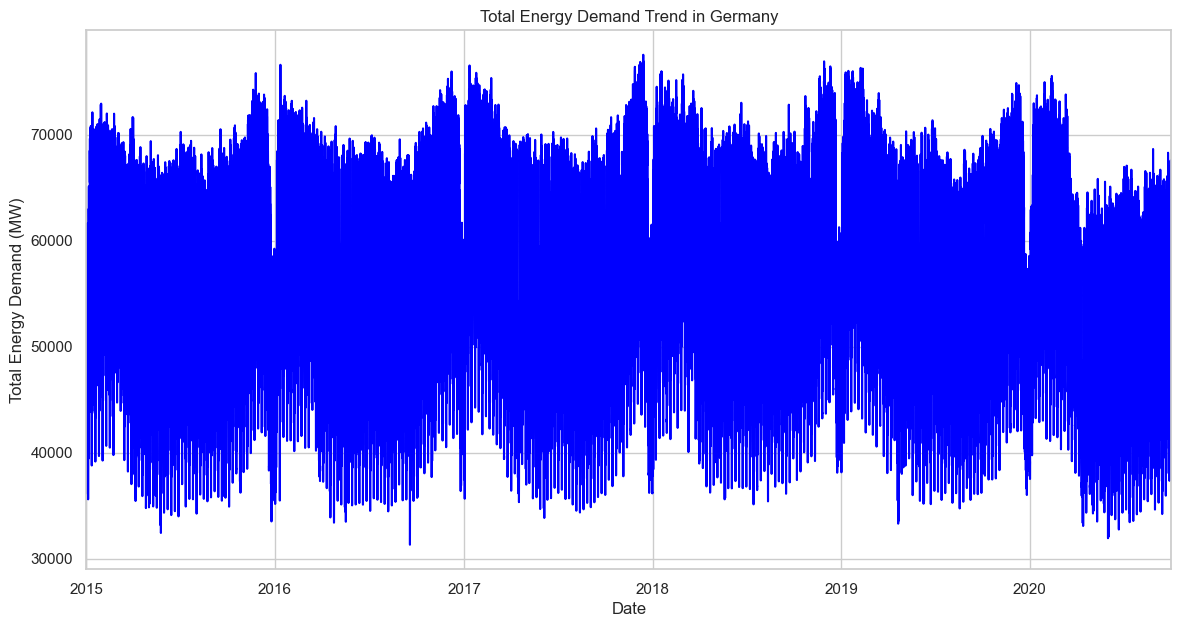

In [36]:
# Plot: Total energy demand trend in Germany
plt.figure(figsize=(14, 7))
data['DE_load_actual_entsoe_transparency'].plot(title='Total Energy Demand Trend in Germany', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Energy Demand (MW)')
plt.show()

In [37]:
# Resample the data to daily and weekly resolution
data_daily = data.resample('D').mean()
data_weekly = data.resample('W').mean()
data_monthly = data.resample('M').mean()

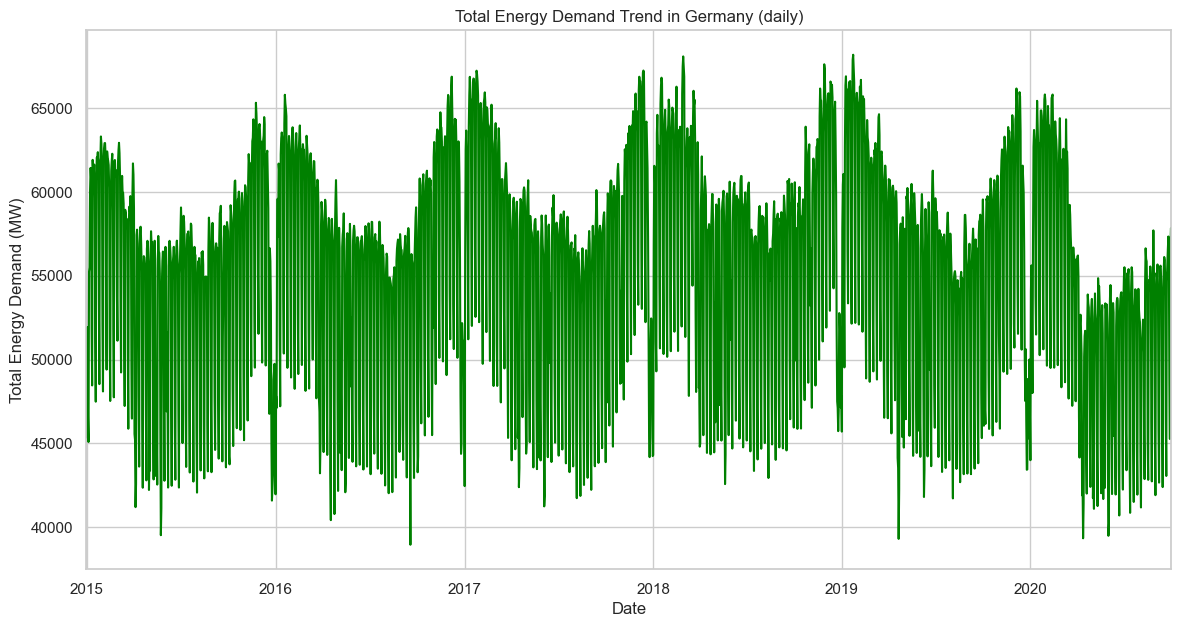

In [55]:
# Plot: Total energy demand trend in Germany
plt.figure(figsize=(14, 7))
data_daily['DE_load_actual_entsoe_transparency'].plot(title='Total Energy Demand Trend in Germany (daily)', color='green')
plt.xlabel('Date')
plt.ylabel('Total Energy Demand (MW)')
plt.show()

In [38]:
data_weekly.head(10)

,DE_solar_generation_actual,DE_wind_generation_actual,DE_load_actual_entsoe_transparency,DE_LU_price_day_ahead
utc_timestamp,,,,
2015-01-04 00:00:00+00:00,585.101124,18507.260417,47233.739583,NaN
2015-01-11 00:00:00+00:00,787.077381,17309.958333,56191.101190,NaN
2015-01-18 00:00:00+00:00,1024.113095,15602.815476,57672.678571,NaN
2015-01-25 00:00:00+00:00,578.154762,2787.720238,58613.303571,NaN
2015-02-01 00:00:00+00:00,779.095238,10045.607143,58734.029762,NaN
2015-02-08 00:00:00+00:00,1514.208333,7860.023810,59323.898810,NaN
2015-02-15 00:00:00+00:00,1788.273810,5923.273810,58137.779762,NaN
2015-02-22 00:00:00+00:00,2295.869048,8410.101190,57802.898810,NaN
2015-03-01 00:00:00+00:00,2499.298611,10484.994048,58862.452381,NaN


In [39]:
# 1. Data Cleaning: Identification and removal of NaN values
missing_values = data_weekly.isnull().sum()
print(missing_values)

DE_solar_generation_actual              0
DE_wind_generation_actual               0
DE_load_actual_entsoe_transparency      0
DE_LU_price_day_ahead                 195
dtype: int64


In [40]:
# Check the length of the series
print("Length of data_daily:", len(data_daily))
print("Length of 'DE_LU_price_day_ahead':", len(data['DE_LU_price_day_ahead']))
# Resample 'DE_LU_price_day_ahead' to daily resolution
data_daily['DE_LU_price_day_ahead'] = data['DE_LU_price_day_ahead'].resample('D').mean()

# Ensure that all series have the same length
print("Length after resampling:", len(data_daily['DE_LU_price_day_ahead']))


Length of data_daily: 2101
Length of 'DE_LU_price_day_ahead': 50401
Length after resampling: 2101


In [41]:
data_weekly.head(500)

,DE_solar_generation_actual,DE_wind_generation_actual,DE_load_actual_entsoe_transparency,DE_LU_price_day_ahead
utc_timestamp,,,,
2015-01-04 00:00:00+00:00,585.101124,18507.260417,47233.739583,NaN
2015-01-11 00:00:00+00:00,787.077381,17309.958333,56191.101190,NaN
2015-01-18 00:00:00+00:00,1024.113095,15602.815476,57672.678571,NaN
2015-01-25 00:00:00+00:00,578.154762,2787.720238,58613.303571,NaN
2015-02-01 00:00:00+00:00,779.095238,10045.607143,58734.029762,NaN
...,...,...,...,...
2020-09-06 00:00:00+00:00,6042.875000,8044.000000,51617.744048,43.014048
2020-09-13 00:00:00+00:00,7545.089286,10386.238095,51507.630952,37.878571
2020-09-20 00:00:00+00:00,7930.815476,8192.279762,52181.327381,48.491190


In [42]:
# Plot variables at original, daily, and weekly resolution
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

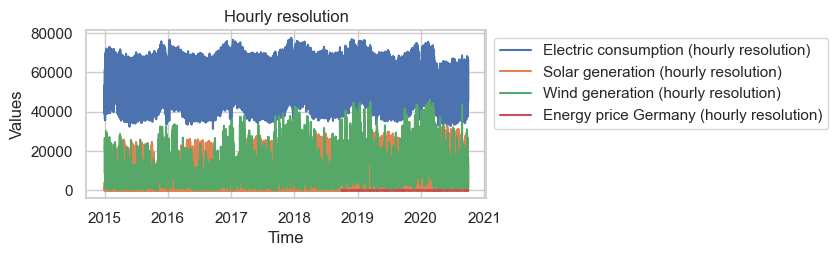

In [43]:
# Plot at original resolution
plt.subplot(2, 1, 2)
plt.plot(data.index, data['DE_load_actual_entsoe_transparency'], label='Electric consumption (hourly resolution)')
plt.plot(data.index, data['DE_solar_generation_actual'], label='Solar generation (hourly resolution)')
plt.plot(data.index, data['DE_wind_generation_actual'], label='Wind generation (hourly resolution)')
plt.plot(data.index, data['DE_LU_price_day_ahead'], label='Energy price Germany (hourly resolution)')
# Set the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust the legend position

plt.title('Hourly resolution')
plt.xlabel('Time')
plt.ylabel('Values')

# Adjust layout to avoid overlapping
plt.subplots_adjust(right=0.75)  # Adjust right space for the legend

# Show the plot
plt.show()

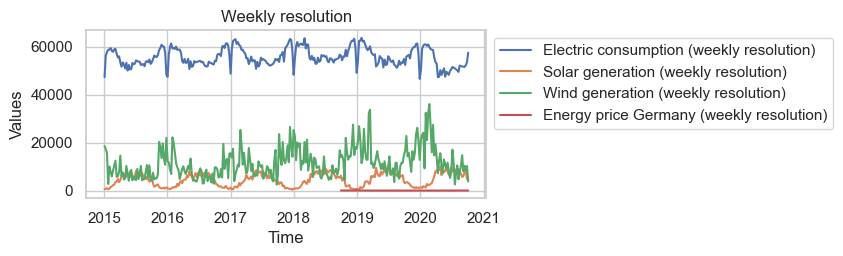

In [44]:
# Plot at weekly resolution
plt.subplot(2, 1, 2)
plt.plot(data_weekly.index, data_weekly['DE_load_actual_entsoe_transparency'], label='Electric consumption (weekly resolution)')
plt.plot(data_weekly.index, data_weekly['DE_solar_generation_actual'], label='Solar generation (weekly resolution)')
plt.plot(data_weekly.index, data_weekly['DE_wind_generation_actual'], label='Wind generation (weekly resolution)')
plt.plot(data_weekly.index, data_weekly['DE_LU_price_day_ahead'], label='Energy price Germany (weekly resolution)')
# Set the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust the legend position

plt.title('Weekly resolution')
plt.xlabel('Time')
plt.ylabel('Values')

# Adjust layout to avoid overlapping
plt.subplots_adjust(right=0.75)  # Adjust right space for the legend

# Show the plot
plt.show()

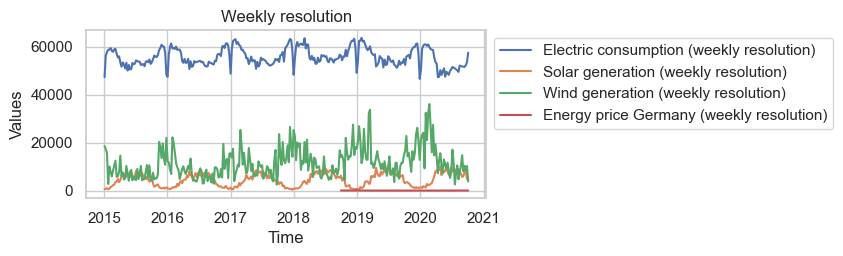

In [45]:
# Plot at weekly resolution
plt.subplot(2, 1, 2)
plt.plot(data_weekly.index, data_weekly['DE_load_actual_entsoe_transparency'], label='Electric consumption (weekly resolution)')
plt.plot(data_weekly.index, data_weekly['DE_solar_generation_actual'], label='Solar generation (weekly resolution)')
plt.plot(data_weekly.index, data_weekly['DE_wind_generation_actual'], label='Wind generation (weekly resolution)')
plt.plot(data_weekly.index, data_weekly['DE_LU_price_day_ahead'], label='Energy price Germany (weekly resolution)')
# Set the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust the legend position

plt.title('Weekly resolution')
plt.xlabel('Time')
plt.ylabel('Values')

# Adjust layout to avoid overlapping
plt.subplots_adjust(right=0.75)  # Adjust right space for the legend

# Show the plot
plt.show()

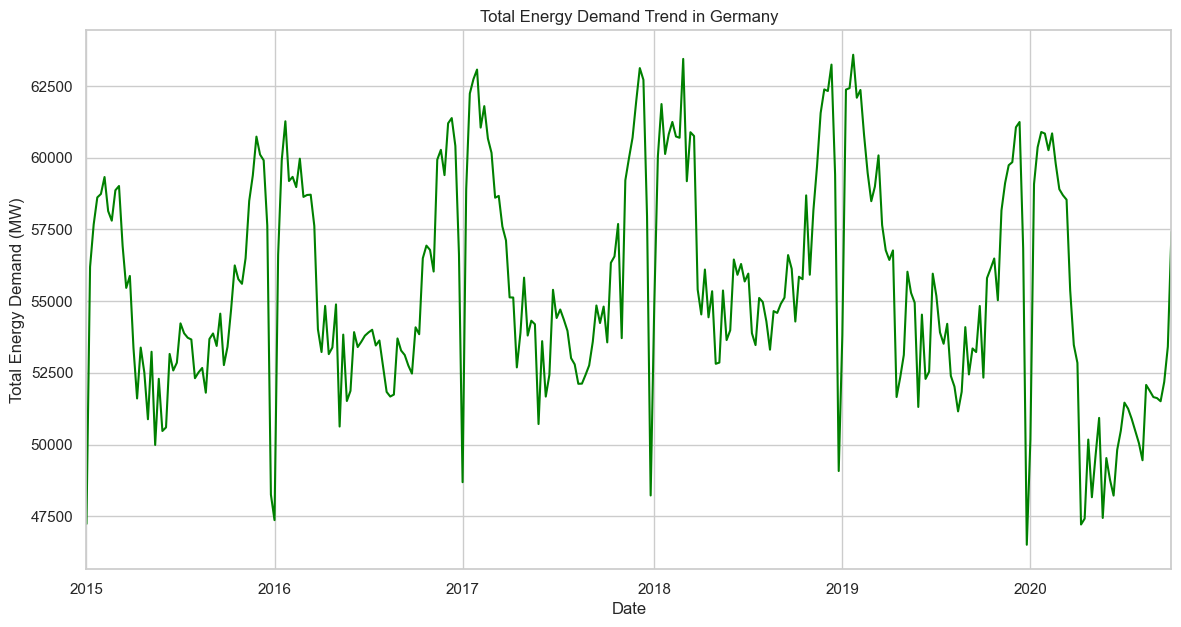

In [46]:
# 2. Trend and Seasonal Pattern Analysis
# Plot 2: Total energy demand trend in Germany
plt.figure(figsize=(14, 7))
data_weekly['DE_load_actual_entsoe_transparency'].plot(title='Total Energy Demand Trend in Germany', color='green')
plt.xlabel('Date')
plt.ylabel('Total Energy Demand (MW)')
plt.show()

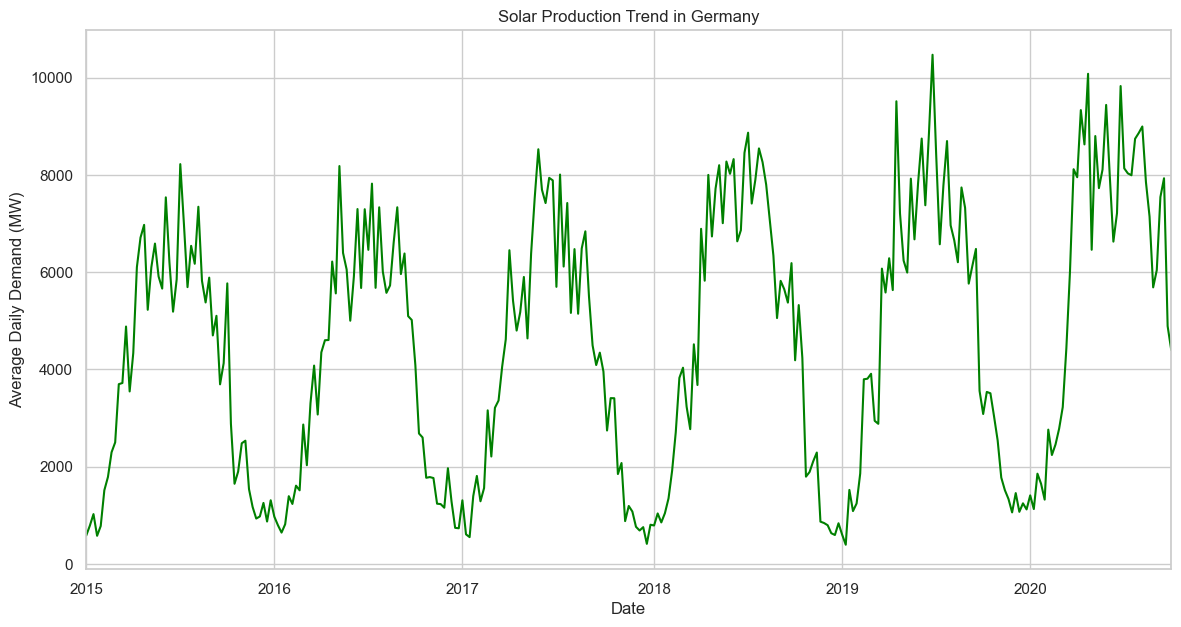

In [47]:
# Plot 3: Weekly seasonality of energy demand in Germany
plt.figure(figsize=(14, 7))
data_weekly['DE_solar_generation_actual'].plot(title='Solar Production Trend in Germany', color='green')
plt.xlabel('Date')
plt.ylabel('Average Daily Demand (MW)')
plt.show()

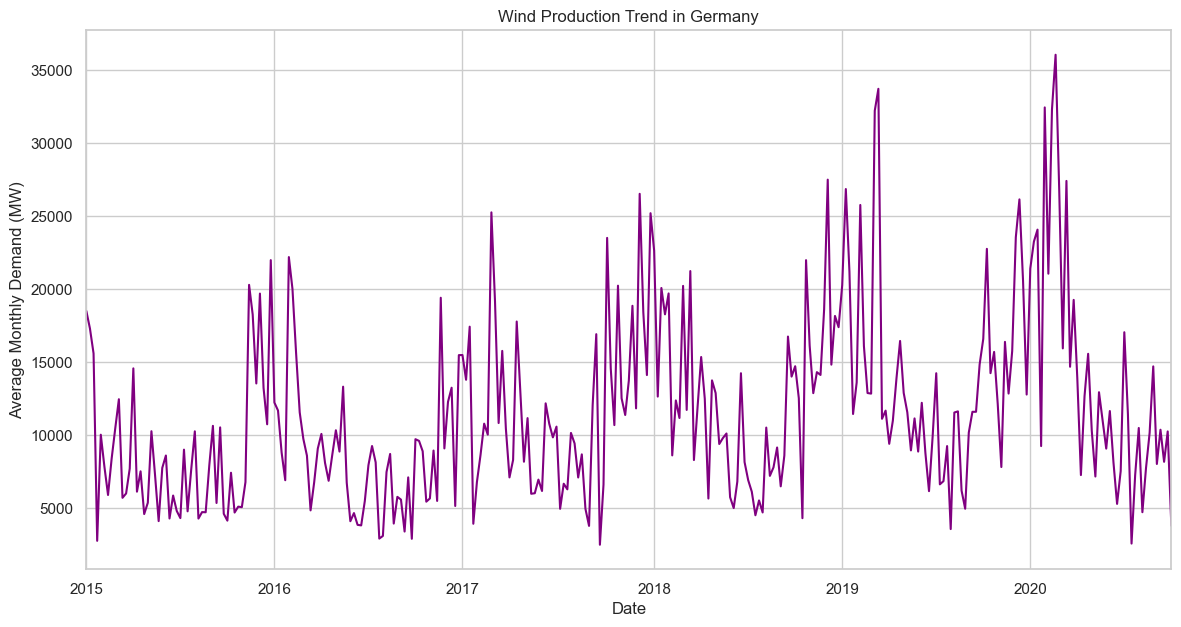

In [48]:
# Plot 4: Monthly seasonality of energy demand in Germany
plt.figure(figsize=(14, 7))
data_weekly['DE_wind_generation_actual'].plot(title='Wind Production Trend in Germany', color='purple')
plt.xlabel('Date')
plt.ylabel('Average Monthly Demand (MW)')
plt.show()

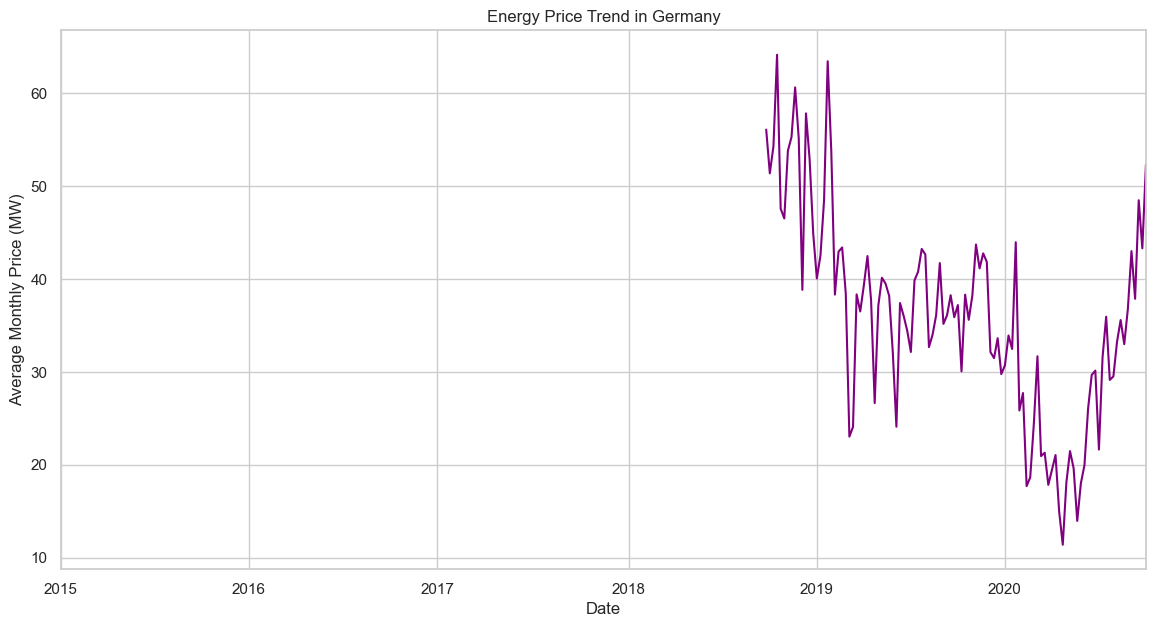

In [49]:
# Plot 5: Monthly seasonality of energy price in Germany
plt.figure(figsize=(14, 7))
data_weekly['DE_LU_price_day_ahead'].plot(title='Energy Price Trend in Germany', color='purple')
plt.xlabel('Date')
plt.ylabel('Average Monthly Price (MW)')
plt.show()

In [50]:
# 4. Feature Correlation
correlation_matrix = data_weekly.corr()

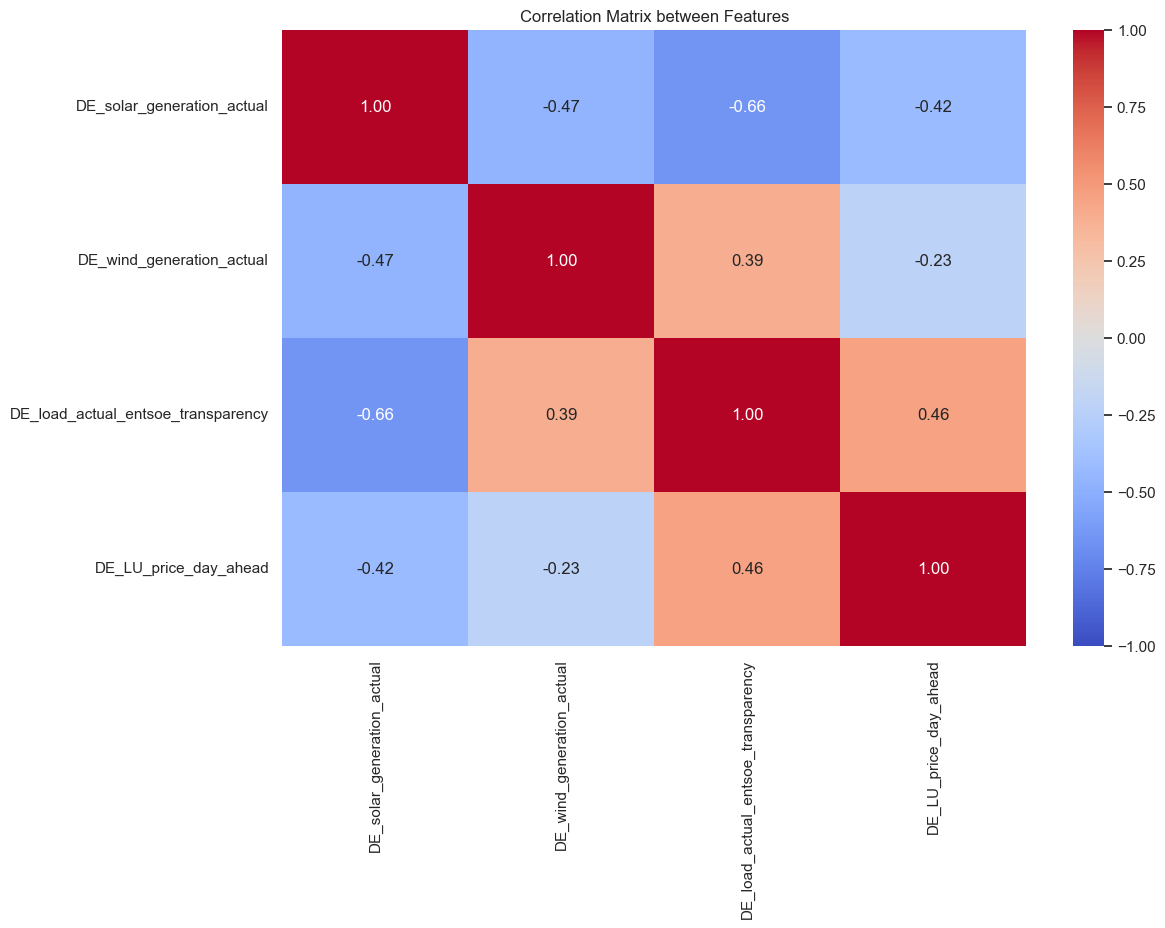

Correlations with the target variable:
 DE_load_actual_entsoe_transparency    1.000000
DE_LU_price_day_ahead                 0.456696
DE_wind_generation_actual             0.394931
DE_solar_generation_actual           -0.655445
Name: DE_load_actual_entsoe_transparency, dtype: float64
Features with significant correlation: ['DE_load_actual_entsoe_transparency', 'DE_solar_generation_actual']


In [51]:
# Plot 6: Correlation Matrix between features
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Features')
plt.show()
# Filter the strongest correlations with the target variable
target_correlation = correlation_matrix['DE_load_actual_entsoe_transparency'].sort_values(ascending=False)
print("Correlations with the target variable:\n", target_correlation)

# Select features with an absolute correlation greater than 0.5 (adjustable threshold)
significant_features = target_correlation[abs(target_correlation) > 0.5].index.tolist()
print("Features with significant correlation:", significant_features)

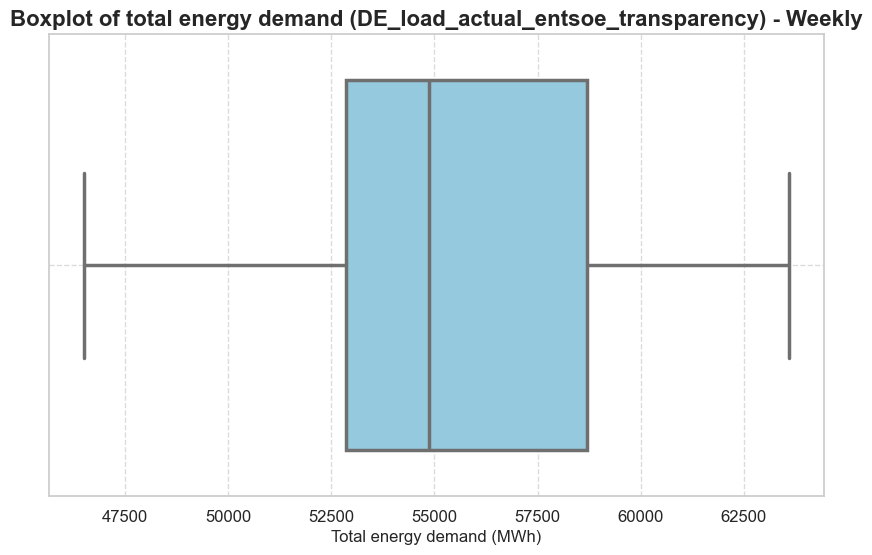

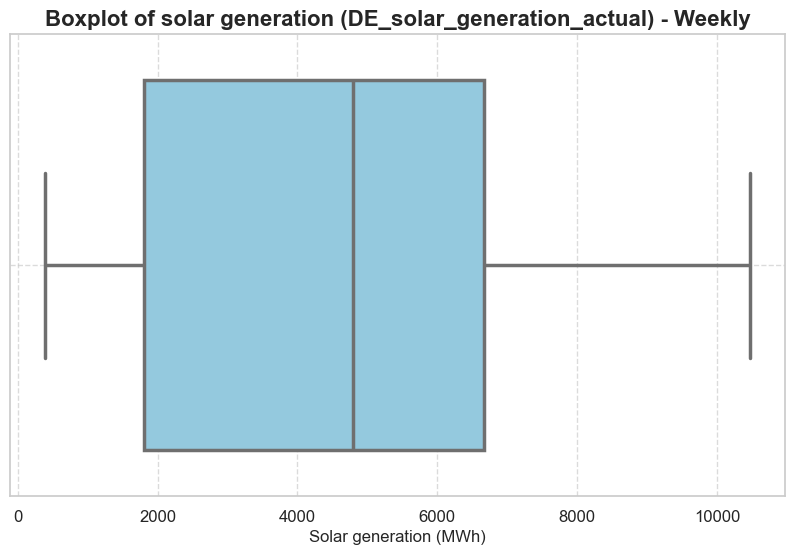

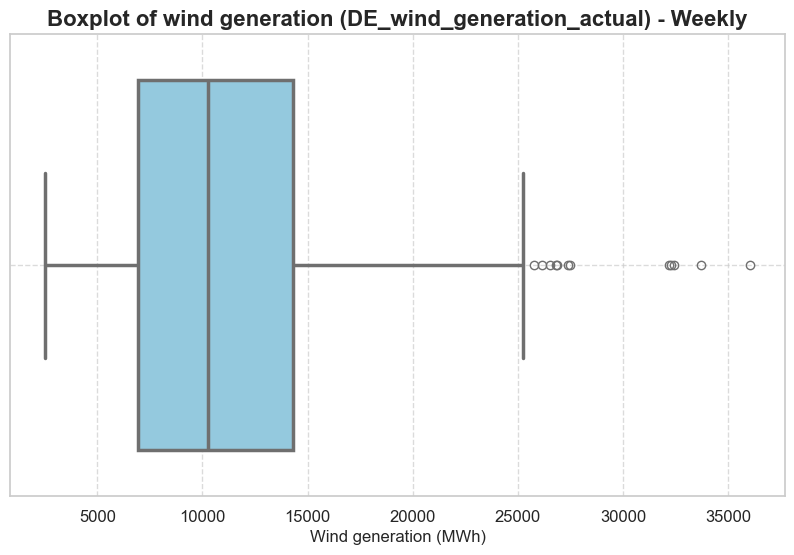

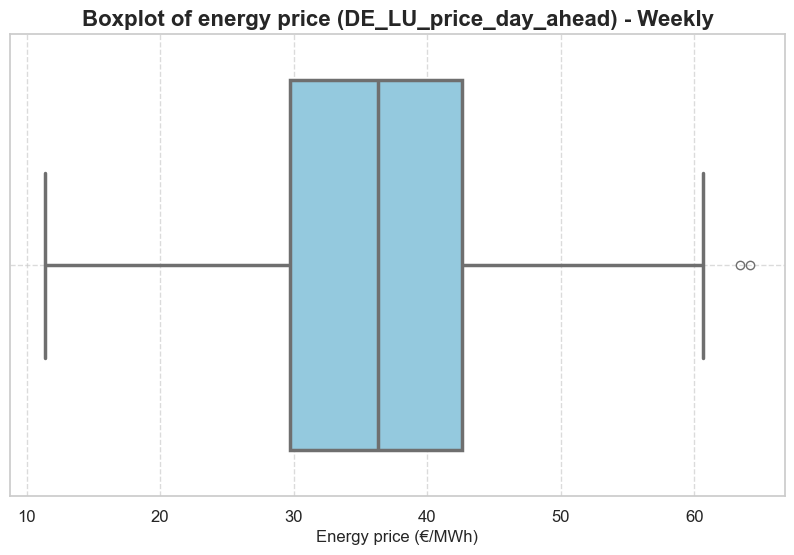

In [52]:
# 5. Outlier Analysis
# Seaborn visual style
sns.set(style="whitegrid")

# Create a subset of the relevant columns from the weekly data
relevant_columns = ['DE_load_actual_entsoe_transparency', 'DE_solar_generation_actual', 
                    'DE_wind_generation_actual', 'DE_LU_price_day_ahead']

# Filter the data with the selected columns
relevant_data = data_weekly[relevant_columns]

# Function to generate boxplots with improved design
def create_boxplot(data, title, xlabel):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data, color="skyblue", linewidth=2.5)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Boxplot for total energy demand (DE_load_actual_entsoe_transparency)
create_boxplot(relevant_data['DE_load_actual_entsoe_transparency'].dropna(),
               'Boxplot of total energy demand (DE_load_actual_entsoe_transparency) - Weekly',
               'Total energy demand (MWh)')

# Boxplot for solar generation (DE_solar_generation_actual)
create_boxplot(relevant_data['DE_solar_generation_actual'].dropna(),
               'Boxplot of solar generation (DE_solar_generation_actual) - Weekly',
               'Solar generation (MWh)')

# Boxplot for wind generation (DE_wind_generation_actual)
create_boxplot(relevant_data['DE_wind_generation_actual'].dropna(),
               'Boxplot of wind generation (DE_wind_generation_actual) - Weekly',
               'Wind generation (MWh)')

# Boxplot for energy price (DE_LU_price_day_ahead)
create_boxplot(relevant_data['DE_LU_price_day_ahead'].dropna(),
               'Boxplot of energy price (DE_LU_price_day_ahead) - Weekly',
               'Energy price (€/MWh)')

# %%
data.to_csv(f'processed_data_{n}.csv')

In [53]:
data.to_csv(f'processed_data_{n}.csv')